#### **The Problem: Predicting Loan Approval**
The task is to build a machine learning model to predict whether a loan application will be approved or not based on applicant details and financial metrics. Loan approval decisions are critical for financial institutions as they must balance the risk of defaults with customer inclusivity. Accurate predictions can streamline the approval process, minimize financial risks, and enhance customer satisfaction.

---

#### **The Dataset**
The dataset is curated for **loan approval prediction** and contains **32,581 entries** with **12 features** that include:

1. **Applicant Information:**
   - `person_age`: Age of the applicant.
   - `person_income`: Annual income in USD.
   - `person_home_ownership`: Homeownership status (e.g., Rent, Own, Mortgage).
   - `person_emp_length`: Employment length in years.

2. **Loan Details:**
   - `loan_intent`: Purpose of the loan (e.g., Education, Medical, Personal).
   - `loan_grade`: Risk grade assessing creditworthiness.
   - `loan_amnt`: Loan amount requested.
   - `loan_int_rate`: Interest rate associated with the loan.
   - `loan_percent_income`: Percentage of income allocated for loan repayment.

3. **Credit History:**
   - `cb_person_default_on_file`: Indicator of prior defaults ('Y' or 'N').
   - `cb_person_cred_hist_length`: Length of credit history in years.

4. **Target Variable:**
   - `loan_status`: Indicates whether the loan was approved (`1`) or not (`0`).

---

#### **Dataset Source**
This dataset is from Kaggle: **PS4E9 || Loan Approval Prediction Dataset**, designed for developing machine learning models to predict loan outcomes based on diverse applicant and loan characteristics.
https://docs.google.com/document/d/1JcaW8tkFnjMXAS011on-MxWt44KY_w9NDPHv4qqUfVI/edit?usp=sharing

Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/IAI/Assignment2

/content/drive/MyDrive/IAI/Assignment2


Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer  # Enables IterativeImputer in sklearn
from sklearn.impute import IterativeImputer
from sklearn.utils import resample


## EDA


In [5]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
print('Number of entries: ', df.shape[0])
print('Number of attributes: ',df.shape[1])

Number of entries:  32581
Number of attributes:  12


Selects the features (X) and target (Y) for the prediction task. The target variable loan_status is visualized to check class balance, helping to determine if additional preprocessing is needed.

11 features and 1 target column:
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')


<Axes: xlabel='loan_status'>

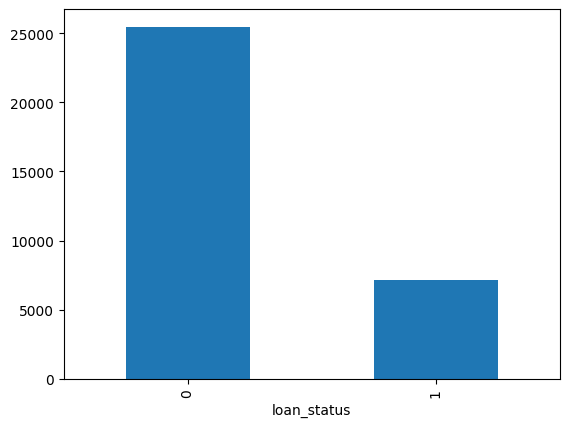

In [8]:
X = df.drop(['loan_status'], axis=1)
Y = df['loan_status']
sp_type_counts = Y.value_counts()
print(f'{X.shape[1]} features and 1 target column:\n{X.columns}')
sp_type_counts.plot.bar()

Calculates and visualizes the correlation matrix for numerical features in the dataset. The correlation matrix helps identify relationships between features, which is critical for feature selection and understanding multicollinearity in the dataset.



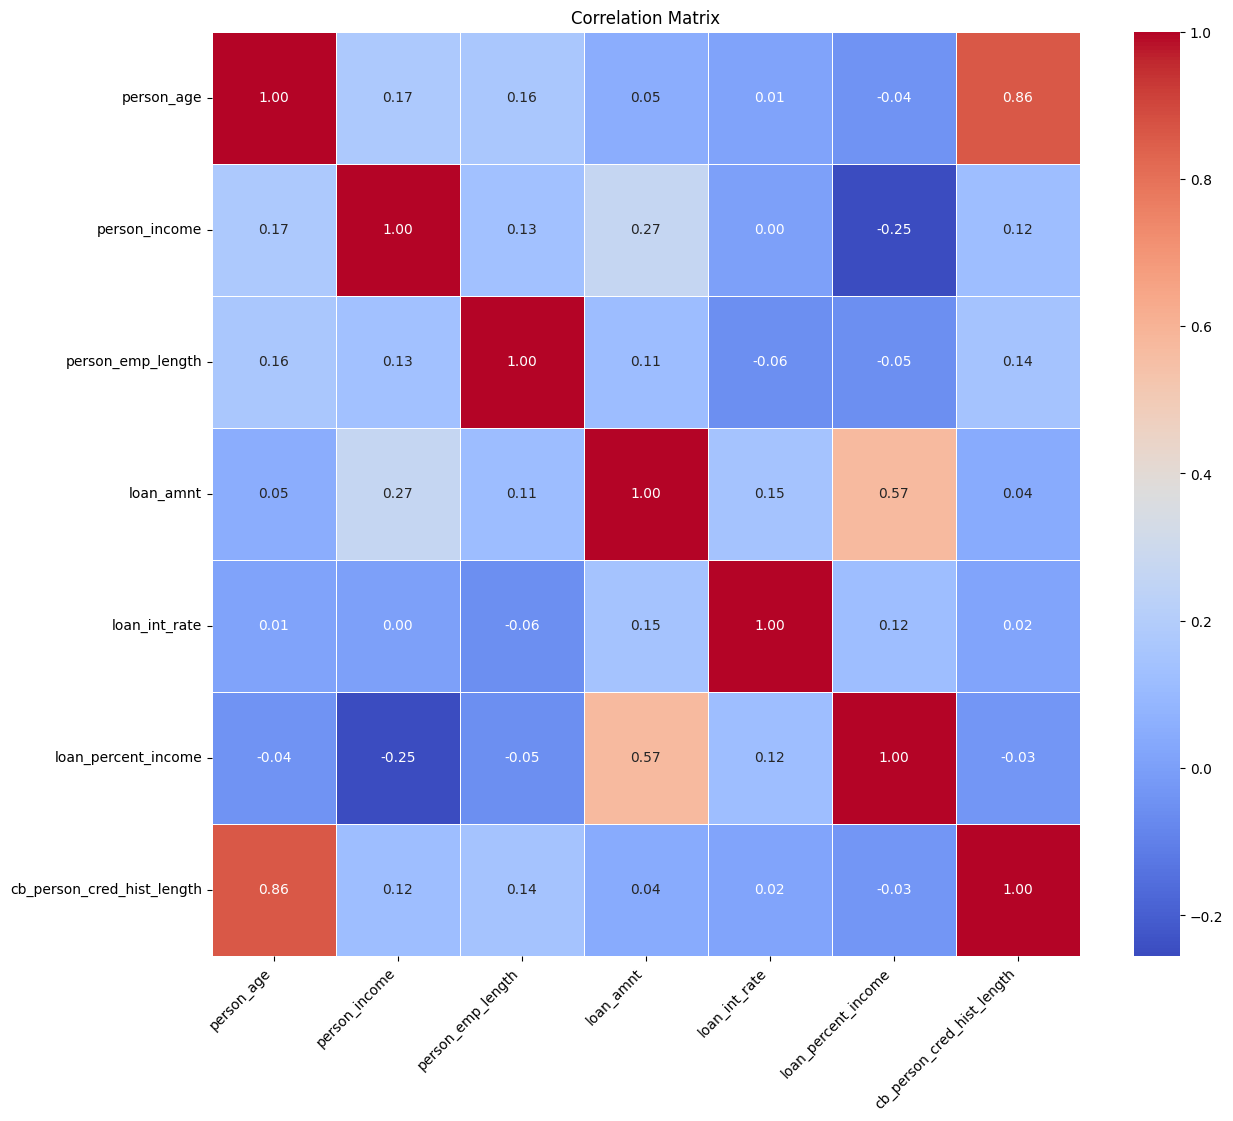

In [9]:
corr_matrix = X.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths =.5)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

Provides a summary of missing values in the dataset, helping identify fields with incomplete data. By calculating the number and percentage of missing values for each feature, it supports informed decisions about data cleaning and imputation.

In [10]:
def summary_missing(data):
  n_miss = data.isnull().sum()
  n_obs = data.shape[0]
  n_miss_per = n_miss/n_obs*100
  n_miss_table = pd.concat([n_miss, n_miss_per], axis=1).sort_values(1, ascending=False).round(2)
  n_miss_table = n_miss_table[n_miss_table[1] != 0]
  print('No fields: ', data.shape[0])
  print('No missing fields: ', n_miss_table.shape[0])
  n_miss_table = n_miss_table.rename(columns={0:'Missing Values', 1:'% of Total Values'})
  return n_miss_table
summary_missing(df)


No fields:  32581
No missing fields:  2


,Missing Values,% of Total Values
loan_int_rate,3116,9.56
person_emp_length,895,2.75


In [11]:
numerical_columns = [i for i in X.columns if X[i].dtype!='O']

print('There are {} numerical_columns variables\n'.format(len(numerical_columns)))

print('The numerical_columns variables are :', numerical_columns)

There are 7 numerical_columns variables

The numerical_columns variables are : ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [12]:
# List of categorical_columns columns to impute with mode
# find categorical_columns variables

categorical_columns = [i for i in X.columns if X[i].dtype=='O']

print('There are {} categorical_columns variables\n'.format(len(categorical_columns)))

print('The categorical_columns variables are :', categorical_columns)



There are 4 categorical_columns variables

The categorical_columns variables are : ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


## Data Preprocessing

### Handling missing values

In [13]:
#Filling missing values for categorical attributes
for i in categorical_columns:
    X[i] = X[i].fillna(X[i].mode()[0])

Apply K-Nearest Neighbors Imputation (KNNImputer) to handle missing values in numerical features. KNNImputer replaces missing values by averaging the values of the k-nearest neighbors, providing a robust and data-driven method for imputation.



In [14]:
from sklearn.impute import KNNImputer

# Set up the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Impute only numerical_columns in X using KNNImputer
X[numerical_columns] = knn_imputer.fit_transform(X[numerical_columns])

# Check for any remaining missing values in X
print("Missing values in X after imputation:", X.isnull().sum().sum())


Missing values in X after imputation: 0


### Handling outliers

Use the Interquartile Range (IQR) method to cap outliers in numerical columns. Outliers are replaced with the upper or lower bounds, ensuring the data remains within a reasonable range without being distorted by extreme values.

In [15]:
for col in numerical_columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X[col] = np.where(X[col] > upper_bound, upper_bound, np.where(X[col] < lower_bound, lower_bound, X[col]))

### Scaling

Standardizes numerical features using StandardScaler, ensuring all numerical columns have a mean of 0 and a standard deviation of 1. This step is essential for machine learning models sensitive to feature magnitudes, such as distance-based algorithms and gradient descent-based optimization.

In [16]:
# Scaling the numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

## Encoding

Apply One-Hot Encoding to transform categorical features into numerical representations, which are essential for machine learning algorithms that cannot process non-numeric data. By creating binary indicator variables for each category, the dataset becomes model-ready.

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Set drop='first' for avoiding multicollinearity (optional)

# Apply One-Hot Encoding
encoded_features = one_hot_encoder.fit_transform(X[categorical_columns])

# Convert encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns from X and concatenate encoded columns
X = X.drop(columns=categorical_columns).reset_index(drop=True)
X = pd.concat([X, encoded_df], axis=1)

# Verify the transformation
print(X.head())


   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -1.032180      -0.107489           2.630257   2.338284       1.604548   
1   -1.221898      -1.660471           0.084756  -1.446371       0.041149   
2   -0.463029      -1.660471          -0.987034  -0.672237       0.595387   
3   -0.842463       0.096850          -0.183191   2.338284       1.351457   
4   -0.652746      -0.252099           0.888599   2.338284       1.043903   

   loan_percent_income  cb_person_cred_hist_length  \
0             2.649408                   -0.729243   
1            -0.672222                   -0.998756   
2             2.649408                   -0.729243   
3             2.649408                   -0.998756   
4             2.649408                   -0.459730   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                          0.0                        0.0   
1                          0.0                        1.0   
2                          0.

### Data splitting

Split the dataset into training and testing subsets using train_test_split, ensuring the model is trained on 80% of the data and tested on the remaining 20%. The stratify parameter preserves the class distribution, which is crucial for imbalanced datasets like loan approval prediction.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Display the sizes of each split
split_summary = {
    "Dataset": ["X_train", "X_test", "y_train", "y_test"],
    "Size": [X_train.shape, X_test.shape, y_train.shape, y_test.shape],
    "Proportion": ["80%", "20%", "80%", "20%"]
}

split_summary_df = pd.DataFrame(split_summary)
print(split_summary_df)

   Dataset         Size Proportion
0  X_train  (26064, 22)        80%
1   X_test   (6517, 22)        20%
2  y_train     (26064,)        80%
3   y_test      (6517,)        20%


In [19]:
futureSample_X = X_test[-2:]
futureSample_y = y_test[-2:]

X_test = X_test[:-2]
y_test = y_test[:-2]

## Dealing with Imbalanced Data

Apply Synthetic Minority Oversampling Technique (SMOTE) to the training data, generating synthetic samples for the minority class to balance the dataset. Balancing classes is crucial for improving the model's performance, especially in scenarios with imbalanced datasets like loan approval prediction.



In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)

# Transform the training data using SMOTE
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(y_train.value_counts())



Class Distribution After SMOTE:
loan_status
0    20378
1    20378
Name: count, dtype: int64


## Modelling

# KNN

Implements a KNN (K-Nearest Neighbors) Classifier. KNN is a classification algorithm that predicts the class of a given test data point by looking at the classes of its K nearest neighbors and using a majority voting scheme.

1. Code Explanation:

  KNNClassifier Class: The class takes an optional parameter n_neighbors (default is 3), which defines how many neighbors to consider when making a prediction.

2. `fit` Method: This method stores the training data (`X_train`) and corresponding labels (`y_train`). It prepares the model for making predictions based on this data.

3. predict Method: This method is used to make predictions on the test data (`X_test`). It applies the `_predict_single` method to each test data point to generate the predictions.

4. `_predict_single` Method: For a single data point, this method calculates the Euclidean distance between the test point and all training points. It then selects the K closest neighbors and performs majority voting to determine the most common class among the neighbors, which becomes the predicted class for that data point.


The purpose of this code is to implement the KNN algorithm to predict the class of new data points based on their similarity to the training data. By adjusting the value of K, you can control the sensitivity of the model, and the accuracy generally improves as the dataset grows and becomes more diverse.

In [21]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        #Save training data and labels
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        #Receive test data and return prediction results
        X_test = np.array(X_test)
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    def _predict_single(self, x):
        #Predict the class of a single data point
        # Euclidean Distance Calculation
        distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
        # Select the nearest k neighbors
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority Voting
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Model Training and Prediction
model = KNNClassifier(n_neighbors=3)
model.fit(X_train, y_train)

Generating predictions

The process of generating a predicted value (`y_pred`) for test data (`X_test`) using the trained model

In [22]:
# Test Data Prediction
y_pred = model.predict(X_test)

Performance measurements

Calculates the accuracy, which represents the proportion of correct predictions made by the model compared to the actual values.

Accuracy is an important metric for evaluating model performance, as higher accuracy indicates that the model is making reliable predictions.

This code is used to assess how well the model performs on the test data.

In [23]:
accuracy_test = accuracy_score(y_test, y_pred)
print (accuracy_test)

0.8228702993092862


Calculates Precision, which is one of the metrics for evaluating the performance of a model. Precision refers to the proportion of true positive predictions (i.e., correctly predicted positive cases) out of all positive predictions made by the model.



*   The average='weighted' option calculates the weighted average precision in a multi-class classification problem, giving more importance to classes with more samples. This is particularly useful when dealing with class imbalance, ensuring that the precision is calculated in a way that reflects the distribution of the classes.


The code uses the metrics.precision_score function to compute the precision on the test data and stores the result in the variable precision_test.

In [24]:
precision_test = metrics.precision_score(y_test, y_pred, average='weighted')
print (precision_test)

0.8469732856391358


Calculates Recall, a metric used to evaluate how well a model detects positive instances. Recall measures the proportion of actual positive cases that are correctly identified by the model.

* The average='weighted' option computes the weighted average recall in a multi-class classification problem, giving more importance to classes with more samples. This ensures that recall is appropriately adjusted based on the distribution of the classes, which is particularly useful in the presence of class imbalance.

The code uses the metrics.recall_score function to calculate recall on the test data and stores the result in the variable recall_test.

In [25]:
recall_test = metrics.recall_score(y_test, y_pred, average='weighted')
print (recall_test)

0.8228702993092862


Calculates the F1-Score, which is the harmonic mean of Precision and Recall. The F1-Score is a useful metric for evaluating a model's overall performance, especially when there is a need to balance Precision and Recall. A high F1-Score indicates a good balance between these two metrics, while a low F1-Score suggests a significant imbalance between Precision and Recall.

* The average='weighted' option computes the weighted average F1-Score in a multi-class classification problem, giving more importance to classes with more samples. This helps adjust for class imbalance when calculating the F1-Score.

The code uses the metrics.f1_score function to calculate the F1-Score on the test data and stores the result in the variable f1_test.

In [26]:
f1_test = metrics.f1_score(y_test, y_pred, average='weighted')
print(f1_test)

0.8308209214106227


Generates and displays a Confusion Matrix to evaluate the performance of a classification model. The Confusion Matrix compares the actual labels (y_test) with the predicted labels (y_pred) and shows the counts of true positives, true negatives, false positives, and false negatives, helping to identify classification errors.

* cm = confusion_matrix(y_test, y_pred): This computes the confusion matrix using the actual and predicted values and stores it in cm.

* cmp = ConfusionMatrixDisplay(cm, display_labels=["1", "0"]): This creates a display object for the confusion matrix, with labels "1" and "0" representing the positive and negative classes.

* cmp.plot(ax=ax): This plots the confusion matrix on the specified axes (ax).

The confusion matrix provides a clear visualization of how well the model distinguishes between the classes and helps identify areas where the model is making errors.

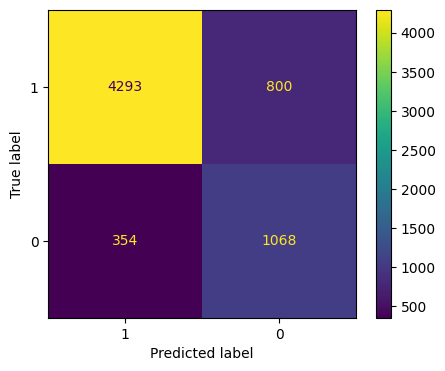

In [27]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1", "0"])
cmp.plot(ax=ax)


Generates a Classification Report to evaluate the performance of a classification model. The report provides key metrics such as Precision, Recall, and F1-Score for each class.

* report = metrics.classification_report(y_test, y_pred): The classification_report function calculates Precision, Recall, F1-Score, and support for each class, based on the actual labels (y_test) and predicted labels (y_pred), and stores the result in report.

* print(report): This prints the classification report, allowing us to assess the model's performance across different metrics.

The report helps us understand the performance of the model for each class and identify areas of strength and weakness.

In [28]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      5093
           1       0.57      0.75      0.65      1422

    accuracy                           0.82      6515
   macro avg       0.75      0.80      0.77      6515
weighted avg       0.85      0.82      0.83      6515



In [29]:
solution_validate = model.predict(futureSample_X)

Compares predicted values (future_predictions) with actual values (futureSample_y) and computes the accuracy.

In [30]:
score_validate = accuracy_score(solution_validate, futureSample_y)
print (score_validate)

1.0


# Random Forest

The chosen AI technique, **Random Forest**, solves the loan approval prediction problem by leveraging an ensemble of decision trees to classify loan applications as either "approved" or "not approved." Here's how it addresses the problem:

**Problem representation**:
Each loan application is represented as a feature vector, with numerical features such as age, income, and loan amount, and categorical features such as homeownership and loan intent. These features are used to train the Random Forest model.

Algorithm Steps in Context:

* **Bootstrap sampling**: Random subsets of the training data are created to train each decision tree independently, ensuring diversity in the forest.
* **Decision Tree Training**: Each tree is trained to split data based on the most informative features, creating a series of decision boundaries for classifying loan statuses.
* **Majority voting**: During prediction, each tree votes on the class, and the forest aggregates these votes to make the final decision. This ensemble approach minimizes errors from individual trees.
* **Probability estimation**: For tasks requiring confidence levels, the algorithm averages the predicted probabilities from all trees.

By combining the strengths of multiple decision trees, Random Forest handles noisy data, avoids overfitting, and provides robust and accurate predictions for loan approval. Below is the Python implementation of the Random Forest algorithm tailored for this problem.


1. **Initialization (`__init__`):**
   - **Purpose:** Sets up the Random Forest model with user-defined hyperparameters:
     - `n_estimators`: Number of decision trees in the forest.
     - `max_depth`: Maximum depth of each tree (limits overfitting).
     - `min_samples_split`: Minimum number of samples required to split a node.
     - `max_features`: Maximum number of features considered for each split.

2. **Bootstrap Sampling (`_bootstrap_sample`):**
   - **Purpose:** Creates a random subset of the dataset with replacement, ensuring each tree is trained on a slightly different sample. This diversity reduces overfitting.

3. **Training (`fit`):**
   - **Purpose:** Trains the Random Forest by:
     - Generating bootstrap samples.
     - Training individual decision trees on these samples.
     - Adding the trained trees to the forest.

4. **Prediction (`predict`):**
   - **Purpose:** Aggregates predictions from all trees using majority voting:
     - Each tree votes for a class.
     - The class with the most votes is the final prediction.

5. **Probability Prediction (`predict_proba`):**
   - **Purpose:** Predicts class probabilities:
     - Each tree outputs probabilities for each class.
     - The average probabilities across all trees provide the final class probabilities.

In [31]:
import numpy as np
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

class RandomForest:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                max_features=self.max_features
            )
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        majority_vote = np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=tree_predictions)
        return majority_vote

    def predict_proba(self, X):
      tree_probas = np.array([tree.predict_proba(X) for tree in self.trees])
      avg_probas = np.mean(tree_probas, axis=0)
      return avg_probas


Accuracy: 0.9116

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5093
           1       0.84      0.73      0.78      1422

    accuracy                           0.91      6515
   macro avg       0.88      0.85      0.86      6515
weighted avg       0.91      0.91      0.91      6515



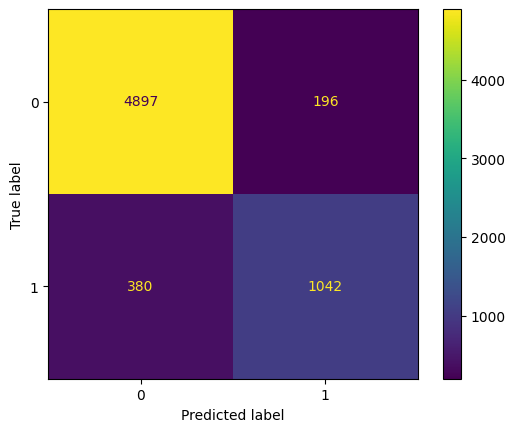

In [32]:
# Convert training and testing datasets to NumPy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Initialize and configure the Random Forest model
# Parameters:
# - n_estimators=100: Number of decision trees in the forest.
# - max_depth=10: Maximum depth of each decision tree to prevent overfitting.
# - max_features='sqrt': Use the square root of the total features for splitting.
rf_model = RandomForest(n_estimators=100, max_depth=10, max_features='sqrt')

# Train the Random Forest model on the training data
rf_model.fit(X_train_np, y_train_np)

# Predict the loan statuses for the test data
# Aggregates predictions from all trees in the forest using majority voting.
rf_predictions = rf_model.predict(X_test_np)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test_np, rf_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print the classification report
# Precision, recall, F1-score, and support for each class.
print("\nClassification Report:")
print(classification_report(y_test_np, rf_predictions))

# Create and display the confusion matrix
cm = confusion_matrix(y_test_np, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_np))
disp.plot()  # Displays the confusion matrix as a heatmap.


Evaluates the **discrimination ability** of the Random Forest model by calculating and visualizing the **Receiver Operating Characteristic (ROC) curve** and the **Area Under the Curve (AUC)**.

- **ROC Curve Representation:**  
  The ROC curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at different classification thresholds. It demonstrates how well the model distinguishes between approved and not-approved loans.

- **AUC Metric:**  
  The **Area Under the Curve (AUC)** quantifies the overall performance of the model. An AUC closer to 1.0 indicates excellent discrimination, while 0.5 suggests no better than random guessing.


ROC-AUC: 0.9210


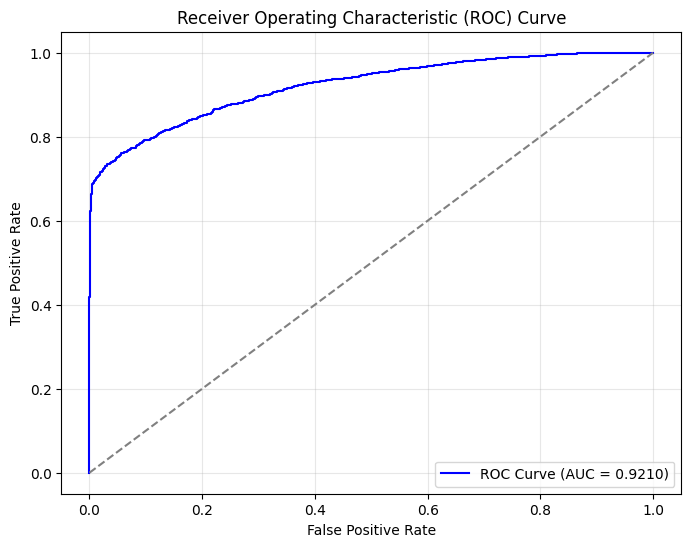

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (assuming binary classification)
# This retrieves the probabilities for the "approved" class (positive class) from the model.
rf_probas = rf_model.predict_proba(X_test_np)[:, 1]

# Compute the ROC curve
# fpr: False Positive Rate
# tpr: True Positive Rate
# thresholds: Decision thresholds corresponding to fpr and tpr.
fpr, tpr, thresholds = roc_curve(y_test_np, rf_probas)

# Compute the AUC (Area Under the Curve)
# AUC measures the ability of the model to distinguish between classes.
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC: {roc_auc:.4f}")


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()



Implements **randomized hyperparameter tuning** to find the optimal parameters for the Random Forest model in the context of loan approval prediction. Here's how it works:

- **Problem representation:**  
  The model is tuned to maximize its ability to classify loan approvals accurately. The dataset is represented as training (`X_train_np`, `y_train_np`) and testing (`X_test_np`, `y_test_np`) sets, ensuring consistent evaluation across parameter combinations.

- **Steps in Hyperparameter Tuning:**  
  1. **Hyperparameter Sampling:** The algorithm explores a pre-defined parameter space, including the number of trees (`n_estimators`), maximum tree depth (`max_depth`), minimum samples required to split a node (`min_samples_split`), and the number of features considered for splitting (`max_features`). For each iteration, a random combination is sampled.  
  2. **Model Training:** A new Random Forest model is initialized with the sampled parameters and trained on the training data.  
  3. **Evaluation:** The model is evaluated using the **ROC-AUC** score, which measures its ability to distinguish between approved and not-approved loans across thresholds.  
  4. **Best Model Selection:** If the current model achieves a higher ROC-AUC score than the previous best, it is stored as the best model along with its parameters.  

This randomized approach efficiently explores the parameter space and identifies the configuration that maximizes model performance, balancing predictive accuracy and computational resources.


In [35]:
import random

# Define hyperparameter space
param_space = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Number of random combinations to try
n_combinations = 10

# Initialize variables to store the best results
best_params = None
best_score = 0
best_model = None

for _ in range(n_combinations):
    # Randomly sample hyperparameters
    n_estimators = random.choice(param_space['n_estimators'])
    max_depth = random.choice(param_space['max_depth'])
    min_samples_split = random.choice(param_space['min_samples_split'])
    max_features = random.choice(param_space['max_features'])

    # Initialize and train the Random Forest model
    rf_model = RandomForest(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features
    )
    rf_model.fit(X_train_np, y_train_np)

    # Predict probabilities for the test set
    rf_probas = rf_model.predict_proba(X_test_np)[:, 1]

    # Compute ROC-AUC
    fpr, tpr, _ = roc_curve(y_test_np, rf_probas)
    roc_auc = auc(fpr, tpr)

    # Check if this is the best model
    if roc_auc > best_score:
        best_score = roc_auc
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'max_features': max_features
        }
        best_model = rf_model

print(f"Best Parameters: {best_params}")
print(f"Best ROC-AUC: {best_score:.4f}")


Best Parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 10, 'max_features': 'log2'}
Best ROC-AUC: 0.9282


# Logistic Regression for Classifcation & Assigning a Likelihood Ratio

Logistic regression is an AI technique designed to model binary outcomes, such as whether a loan will be approved (loan_status = 1) or not (loan_status = 0). It estimates the probability of an outcome based on input variables, such as person_income, loan_amnt, loan_percent_income, and person_age. Logistic regression is ideal here because it not only predicts outcomes but also explains how each factor influences loan approval likelihood.

Why Logistic Regression for Loan Approval? We chose logistic regression because it is interpretable and works well with both numerical data (e.g., income and loan amount) and categorical data (e.g., loan intent and grade). The model assigns weights (coefficients) to each variable, which helps us understand their importance in predicting loan approval.

In [36]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files

In [37]:
# clean data
data_clean = df[['person_income', 'loan_amnt']].dropna()
data_clean.head()

,person_income,loan_amnt
0,59000,35000
1,9600,1000
2,9600,5500
3,65500,35000
4,54400,35000


In [38]:
X = data_clean['person_income']  # independent variable
y = data_clean['loan_amnt']      # dependent variable
X = sm.add_constant(X)           # constant term

In [39]:
model = sm.OLS(y, X).fit()       # linear regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              loan_amnt   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2497.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:22:08   Log-Likelihood:            -3.3017e+05
No. Observations:               32581   AIC:                         6.603e+05
Df Residuals:                   32579   BIC:                         6.604e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7791.1565     49.339    157.910

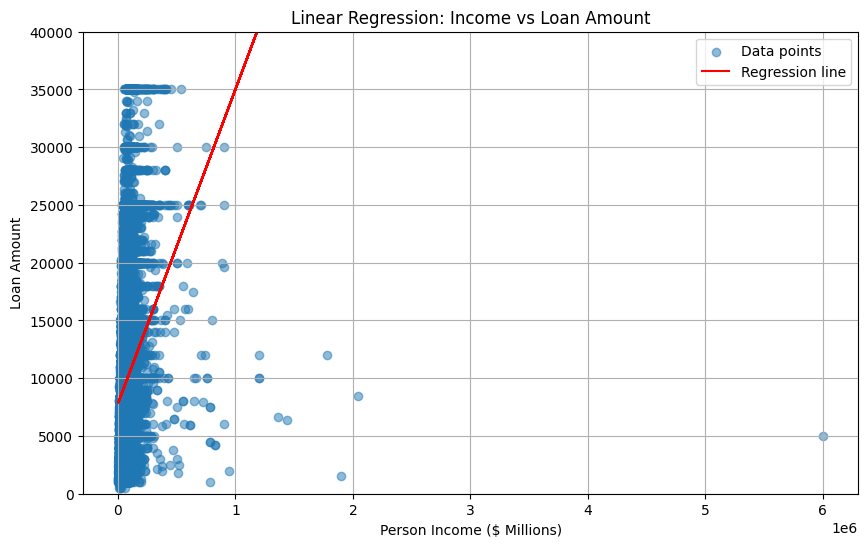

In [40]:
# plot data
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['person_income'], data_clean['loan_amnt'], alpha=0.5, label='Data points')
plt.plot(data_clean['person_income'], model.predict(X), color='red', label='Regression line')
plt.title('Linear Regression: Income vs Loan Amount')
plt.xlabel('Person Income ($ Millions)')
plt.ylabel('Loan Amount')
plt.ylim(0, 40000)
plt.legend()
plt.grid(True)
plt.show()

In [41]:
data_cleaned_age = df[['person_age', 'cb_person_cred_hist_length']].dropna()
X_age = data_cleaned_age['person_age']  # independent variable
y_hist_length = data_cleaned_age['cb_person_cred_hist_length']  # dependent variable
X_age = sm.add_constant(X_age)  # constant term

In [42]:
model_age = sm.OLS(y_hist_length, X_age).fit()
print(model_age.summary())

                                OLS Regression Results                                
Dep. Variable:     cb_person_cred_hist_length   R-squared:                       0.738
Model:                                    OLS   Adj. R-squared:                  0.738
Method:                         Least Squares   F-statistic:                 9.182e+04
Date:                        Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                                12:22:10   Log-Likelihood:                -70015.
No. Observations:                       32581   AIC:                         1.400e+05
Df Residuals:                           32579   BIC:                         1.401e+05
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

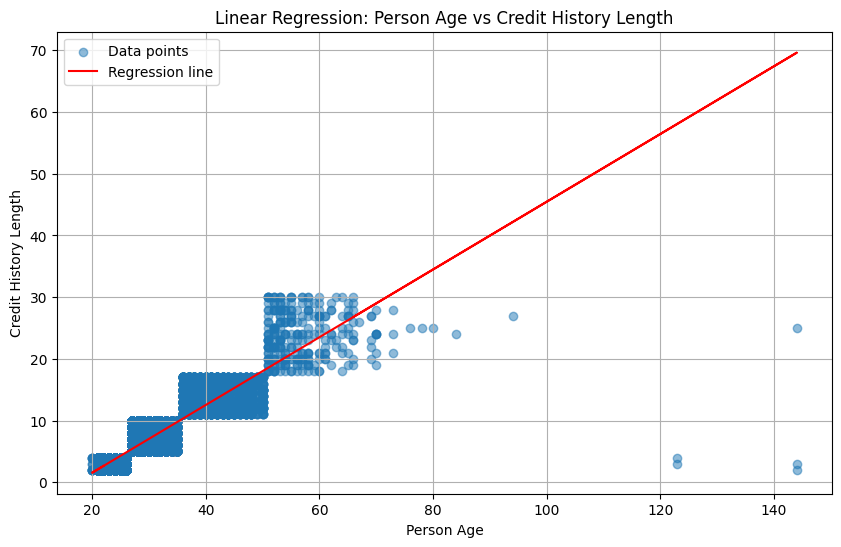

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned_age['person_age'], data_cleaned_age['cb_person_cred_hist_length'], alpha=0.5, label='Data points')
plt.plot(data_cleaned_age['person_age'], model_age.predict(X_age), color='red', label='Regression line')
plt.title('Linear Regression: Person Age vs Credit History Length')
plt.xlabel('Person Age')
plt.ylabel('Credit History Length')
plt.legend()
plt.grid(True)
plt.show()

The likelihood ratio is the predicted probability of loan approval (loan_status = 1). For example, an applicant with high income and a low loan amount might have a likelihood ratio of 0.85, meaning an 85% chance of approval. On the other hand, someone with a high loan percent income—indicating a higher debt burden—might have a likelihood ratio of just 0.30.

Techniques Used: The model preprocesses the data by scaling numerical features (like income and loan amount) and encoding categorical features (like loan intent). It uses logistic regression to train on historical data and predicts probabilities for new applications. Each applicant’s attributes are evaluated to produce a likelihood ratio.

Model Insights: The output shows that applicants with lower loan percent income (a smaller loan amount relative to their income) are more likely to repay loans and therefore have higher likelihood ratios. For example, someone borrowing $10,000 with an income of $60,000 has more disposable income and a greater chance of approval compared to someone with a lower income and the same loan amount.

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for the test data
# - Predict the likelihood (probability) of loan_status being 1 (approved)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of loan_status = 1 (approved)

# Combine test data with Likelihood Ratio
# - Copy the original test data
# - Add the predicted likelihood ratio as a new column
results = X_test.copy()  # Copy the original test set
results['Likelihood_Ratio'] = y_prob
results['Actual_Loan_Status'] = y_test.values  # Add the actual loan status for reference

# Display example results
print("\nSample Results with Likelihood Ratios:")
print(results.head())

# Evaluate the model
y_pred = model.predict(X_test)  # Predict loan status using the test data
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Sample Results with Likelihood Ratios:
       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
6616    -1.032180      -0.390421           0.352704  -0.586222       0.281425   
21802    0.864992      -0.327547          -1.254981  -0.392689      -1.128197   
31886    1.813578       2.446757          -0.451139   1.478135      -0.199128   
17799   -0.273311       1.181422           0.084756   2.338284      -0.006907   
5207    -0.842463      -0.568354          -1.254981  -1.102312       0.630627   

       loan_percent_income  cb_person_cred_hist_length  \
6616             -0.476832                   -0.998756   
21802            -0.281442                    1.157348   
31886            -0.769917                    2.235400   
17799             0.695508                   -0.459730   
5207             -0.965307                   -0.729243   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
6616                           0.0                        0